# Conjunto de datos

Primero, se leen las imágenes para representarlas como un conjunto lineal, en dónde cada pixel es modelado hacia un número entero.

Cabe notar que aquí hay un cambio conceptual acerca de los conjuntos, en dónde en cátedra se tiene que el conjunto de testing es el que se usa para tomar decisiones de hiperparámetros y diseño de las máquinas y es el conjunto de validación el utilizado para elegir entre múltiples máquinas o modelos.

Dado esto, y por consistencia de enunciado, se utilizará la convención dada en esta parte de la tarea

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
def load_data():
    train = pd.read_csv('data/sign_mnist_train.csv')
    test = pd.read_csv('data/sign_mnist_test.csv')
    (train_set, validation_set) = train_test_split(train, test_size=7000, random_state=8500)
    
    y_tr = train_set['label']
    x_tr = train_set.iloc[:, 1:]
    
    y_t = test['label']
    x_t = test.iloc[:, 1:]
    
    y_v = validation_set['label']
    x_v = validation_set.iloc[:, 1:]

    return(x_tr,x_v,x_t,y_tr,y_v,y_t)
x_tr, x_v, x_t, y_tr, y_v , y_t = load_data()

# Escalamiento

A continuación se presentan dos formas de escalar las imágenes

In [2]:
from sklearn import preprocessing

def scale_by_max_pixel(x_set):
    return x_set/255

def center_and_scale(x_set):
    return preprocessing.scale(x_set)

# Diseño de redes neuronales

A continuación se presentan propuestas de diseño de redes neuronales para el problema y se selecciona aquel con mejor accuracy sobre el conjunto de validación

### Red neuronal 1

Esta red neuronal consiste en la misma red dada en el enunciado, pero que utilizar rmsProps como optimizador

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical

# Creación de red secuencial
model1 = Sequential()
model1.add(Dense(30, input_dim=x_tr.shape[1], init='uniform', activation='relu'))
model1.add(Dense(30, init='uniform', activation='relu'))
model1.add(Dense(25, init='uniform', activation='softmax'))
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model1.fit(x_tr.values, to_categorical(y_tr), nb_epoch=100, batch_size=128, verbose=1,
validation_data=(x_v.values,to_categorical(y_v)))

Using TensorFlow backend.
/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=784, activation="relu", kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="relu", kernel_initializer="uniform")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, activation="softmax", kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/site-packages/keras/m

Train on 20455 samples, validate on 7000 samples
Epoch 1/100
20455/20455 [==============================] - 1s 55us/step - loss: 3.2256 - acc: 0.0485 - val_loss: 3.1655 - val_acc: 0.0767
Epoch 2/100
20455/20455 [==============================] - 1s 43us/step - loss: 2.9841 - acc: 0.1043 - val_loss: 2.7006 - val_acc: 0.1631
Epoch 3/100
20455/20455 [==============================] - 1s 39us/step - loss: 2.6731 - acc: 0.1589 - val_loss: 2.4604 - val_acc: 0.2063
Epoch 4/100
20455/20455 [==============================] - 1s 40us/step - loss: 2.4708 - acc: 0.1963 - val_loss: 2.6592 - val_acc: 0.1767
Epoch 5/100
20455/20455 [==============================] - 1s 43us/step - loss: 2.3605 - acc: 0.2180 - val_loss: 2.1319 - val_acc: 0.2573
Epoch 6/100
20455/20455 [==============================] - 1s 38us/step - loss: 2.2687 - acc: 0.2389 - val_loss: 2.0842 - val_acc: 0.2777
Epoch 7/100
20455/20455 [==============================] - 1s 42us/step - loss: 2.2088 - acc: 0.2494 - val_loss: 2.4560 - v

20455/20455 [==============================] - 1s 39us/step - loss: 1.6280 - acc: 0.4223 - val_loss: 1.4512 - val_acc: 0.4629
Epoch 60/100
20455/20455 [==============================] - 1s 39us/step - loss: 1.6342 - acc: 0.4188 - val_loss: 3.0235 - val_acc: 0.2520
Epoch 61/100
20455/20455 [==============================] - 1s 39us/step - loss: 1.6458 - acc: 0.4211 - val_loss: 2.2982 - val_acc: 0.3171
Epoch 62/100
20455/20455 [==============================] - 1s 45us/step - loss: 1.6559 - acc: 0.4141 - val_loss: 1.4950 - val_acc: 0.4529
Epoch 63/100
20455/20455 [==============================] - 1s 46us/step - loss: 1.6366 - acc: 0.4188 - val_loss: 1.4600 - val_acc: 0.4604
Epoch 64/100
20455/20455 [==============================] - 1s 42us/step - loss: 1.6414 - acc: 0.4220 - val_loss: 1.4348 - val_acc: 0.4586
Epoch 65/100
20455/20455 [==============================] - 1s 44us/step - loss: 1.6182 - acc: 0.4262 - val_loss: 1.4638 - val_acc: 0.4674
Epoch 66/100
20455/20455 [==============

Con un accuracy de validación igual a 0.4204

### Red neuronal 2

Esta red corresponde a una serie de capas relu con una cantidad de neuronas decreciente y qu siguen potencias de 2. Además, utiliza el mismo optimizador que la red anterior

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical

# Creación de red secuencial
model2 = Sequential()
model2.add(Dense(512, input_dim=x_tr.shape[1], init='uniform', activation='relu'))
model2.add(Dense(256, init='uniform', activation='relu'))
model2.add(Dense(128, init='uniform', activation='relu'))
model2.add(Dense(64, init='uniform', activation='relu'))
model2.add(Dense(32, init='uniform', activation='relu'))
model2.add(Dense(25, init='uniform', activation='softmax'))
model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model2.fit(x_tr.values, to_categorical(y_tr), nb_epoch=100, batch_size=128, verbose=1,
validation_data=(x_v.values,to_categorical(y_v)))

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, input_dim=784, activation="relu", kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, activation="relu", kernel_initializer="uniform")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, activation="relu", kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call t

Train on 20455 samples, validate on 7000 samples
Epoch 1/100
20455/20455 [==============================] - 3s 156us/step - loss: 3.0929 - acc: 0.0801 - val_loss: 3.2349 - val_acc: 0.0656
Epoch 2/100
20455/20455 [==============================] - 3s 129us/step - loss: 2.8687 - acc: 0.1212 - val_loss: 2.8490 - val_acc: 0.1046
Epoch 3/100
20455/20455 [==============================] - 3s 130us/step - loss: 2.6826 - acc: 0.1598 - val_loss: 2.3472 - val_acc: 0.2437
Epoch 4/100
20455/20455 [==============================] - 3s 127us/step - loss: 2.3854 - acc: 0.2320 - val_loss: 2.3387 - val_acc: 0.2434
Epoch 5/100
20455/20455 [==============================] - 3s 123us/step - loss: 2.1285 - acc: 0.2971 - val_loss: 1.7215 - val_acc: 0.4046
Epoch 6/100
20455/20455 [==============================] - 3s 139us/step - loss: 1.9627 - acc: 0.3415 - val_loss: 1.9858 - val_acc: 0.3321
Epoch 7/100
20455/20455 [==============================] - 3s 137us/step - loss: 1.7867 - acc: 0.3926 - val_loss: 1.5

20455/20455 [==============================] - 2s 121us/step - loss: 0.5227 - acc: 0.9104 - val_loss: 0.2923 - val_acc: 0.9133
Epoch 60/100
20455/20455 [==============================] - 2s 121us/step - loss: 0.6411 - acc: 0.9035 - val_loss: 0.3051 - val_acc: 0.9141
Epoch 61/100
20455/20455 [==============================] - 2s 122us/step - loss: 0.5586 - acc: 0.9066 - val_loss: 0.7602 - val_acc: 0.8536
Epoch 62/100
20455/20455 [==============================] - 3s 137us/step - loss: 0.5506 - acc: 0.9072 - val_loss: 0.1438 - val_acc: 0.9714
Epoch 63/100
20455/20455 [==============================] - 3s 141us/step - loss: 0.5350 - acc: 0.9057 - val_loss: 0.7670 - val_acc: 0.8454
Epoch 64/100
20455/20455 [==============================] - 3s 137us/step - loss: 0.5321 - acc: 0.8963 - val_loss: 0.1183 - val_acc: 0.9747
Epoch 65/100
20455/20455 [==============================] - 3s 132us/step - loss: 0.7277 - acc: 0.8809 - val_loss: 0.3474 - val_acc: 0.9083
Epoch 66/100
20455/20455 [=======

Con un accuracy de validación igual a 0.9341

### Red neuronal 3

La misma red neuronal que en 2, pero con menos épocas (60).

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical

# Creación de red secuencial
model3 = Sequential()
model3.add(Dense(512, input_dim=x_tr.shape[1], init='uniform', activation='relu'))
model3.add(Dense(256, init='uniform', activation='relu'))
model3.add(Dense(128, init='uniform', activation='relu'))
model3.add(Dense(64, init='uniform', activation='relu'))
model3.add(Dense(32, init='uniform', activation='relu'))
model3.add(Dense(25, init='uniform', activation='softmax'))
model3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model3.fit(x_tr.values, to_categorical(y_tr), nb_epoch=60, batch_size=128, verbose=1,
validation_data=(x_v.values,to_categorical(y_v)))

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, input_dim=784, activation="relu", kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, activation="relu", kernel_initializer="uniform")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, activation="relu", kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call t

Train on 20455 samples, validate on 7000 samples
Epoch 1/60
20455/20455 [==============================] - 4s 171us/step - loss: 3.1416 - acc: 0.0644 - val_loss: 2.8436 - val_acc: 0.1370
Epoch 2/60
20455/20455 [==============================] - 3s 148us/step - loss: 2.8227 - acc: 0.1377 - val_loss: 2.6056 - val_acc: 0.1837
Epoch 3/60
20455/20455 [==============================] - 3s 155us/step - loss: 2.4672 - acc: 0.2063 - val_loss: 2.2577 - val_acc: 0.2639
Epoch 4/60
20455/20455 [==============================] - 3s 146us/step - loss: 2.2792 - acc: 0.2558 - val_loss: 2.0241 - val_acc: 0.3054
Epoch 5/60
20455/20455 [==============================] - 3s 148us/step - loss: 2.0594 - acc: 0.3173 - val_loss: 1.7244 - val_acc: 0.4110
Epoch 6/60
20455/20455 [==============================] - 3s 147us/step - loss: 1.8714 - acc: 0.3740 - val_loss: 1.7153 - val_acc: 0.4101
Epoch 7/60
20455/20455 [==============================] - 3s 143us/step - loss: 1.6893 - acc: 0.4389 - val_loss: 1.4225 - v

20455/20455 [==============================] - 3s 150us/step - loss: 0.5151 - acc: 0.9056 - val_loss: 1.2161 - val_acc: 0.7126
Epoch 60/60
20455/20455 [==============================] - 3s 146us/step - loss: 0.5593 - acc: 0.8979 - val_loss: 1.7119 - val_acc: 0.7837


Con un accuracy de validación igual a 0.7837

Por tanto, la mejor red neuronal corresponde a la **segunda**

# Matriz de confusión

La matriz de confusión de la red neuronal obtenida en el tercer modelo corresponde a:

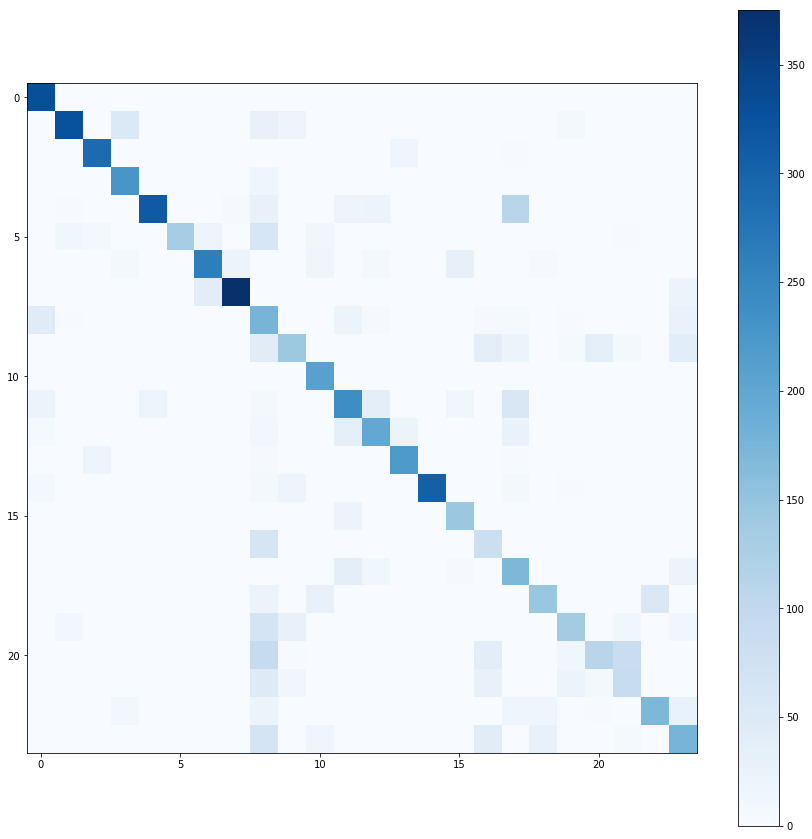

In [9]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
y_t_predict = model2.predict_classes(x_t.values)
cm = confusion_matrix(y_t, y_t_predict)
    
plt.figure(figsize=(15, 15))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.show()

Se tiene que mientras más azul es el área, mayor es la dificultad de la red neuronal para clasificar correctamente las clases. Por tanto, se puede observar que a la red le cuesta más clasificar la letra 8 (h) considerando que es en dónde más se tiene conflictos al clasificar.

Cabe notar que es normal que exista una dificultad de clasificación en la diagonal debido a que es dificil distinguir una clase de si misma.

# SVM no lineal

##### Sin procesamiento

La SVM no lineal sin procesamiento toma demasiado tiempo en converger a una solución, por lo que en lugar de buscar hiperparámetros correctos se utilizará una SVM no lineal con parámetro estándar C=0.5 y kernel tipo RBF para obtener algún resultado.

La búsqueda de parámetros se realizará en una SVM con procesamiento.

In [12]:
from sklearn.svm import SVC as SVM
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

def train_svm(param):
    model = SVM()
    model.set_params(C=param, kernel='rbf')
    model.fit(x_tr, y_tr)

    y_tr_pred = model.predict(x_tr)
    y_v_pred = model.predict(x_v)

    train_error = (1-accuracy_score(y_tr, y_tr_pred))
    test_error = (1-accuracy_score(y_v, y_v_pred))
    
    return (train_error, test_error)

def graph_svm_range(params):
    train_errors = []
    test_errors = []

    for depth in params:
        print('Trying param %f' % depth)
        (train, test) = train_svm(depth)
        train_errors.append(train)
        test_errors.append(test)

    plt.figure(figsize=(10, 8))
    plt.plot(params, train_errors, label="Train Error")
    plt.plot(params, test_errors, label="Test Error")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('RBF')
    plt.ylabel('Error')
    plt.show()
    
train_svm(0.5)

(0.65631874847225613, 0.92414285714285715)

Con accuracy de validación de 0.08

##### Con procesamiento

Primero, se realizará reducción de dimensionalidad para permitir la búsqueda del mejor hiperparámetro C

Trying param 0.001000
Trying param 0.251000
Trying param 0.501000
Trying param 0.751000


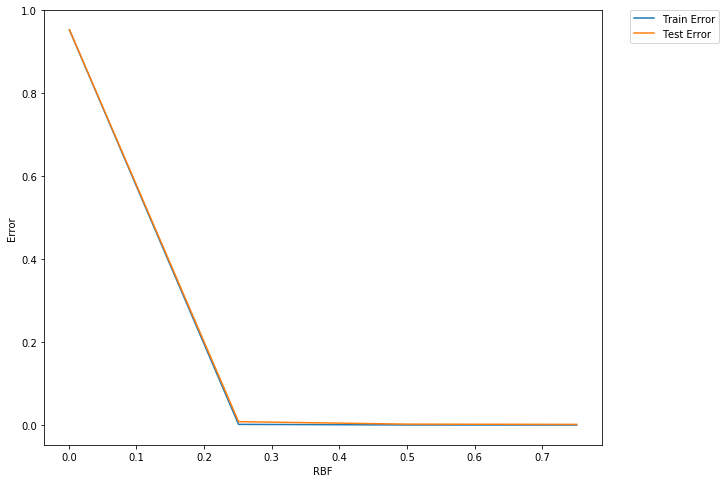

In [13]:
from sklearn.decomposition import PCA
import numpy as np

x_tr_scaled = center_and_scale(x_tr)
x_t_scaled = center_and_scale(x_t)
x_v_scaled = center_and_scale(x_v)

pca_model = PCA(n_components=150)
pca_model.fit(x_tr_scaled)
x_tr_dim = pca_model.transform(x_tr_scaled)
x_t_dim = pca_model.transform(x_tr_scaled)
x_v_dim = pca_model.transform(x_v_scaled)

def train_svm(param, x_tr, y_tr, x_v, y_v):
    model = SVM()
    model.set_params(C=param, kernel='rbf')
    model.fit(x_tr, y_tr)

    y_tr_pred = model.predict(x_tr)
    y_v_pred = model.predict(x_v)

    train_error = (1-accuracy_score(y_tr, y_tr_pred))
    test_error = (1-accuracy_score(y_v, y_v_pred))
    
    return (train_error, test_error)

def graph_svm_range(params, x_tr, y_tr, x_v, y_v):
    train_errors = []
    test_errors = []

    for depth in params:
        print('Trying param %f' % depth)
        (train, test) = train_svm(depth, x_tr, y_tr, x_v, y_v)
        train_errors.append(train)
        test_errors.append(test)

    plt.figure(figsize=(10, 8))
    plt.plot(params, train_errors, label="Train Error")
    plt.plot(params, test_errors, label="Test Error")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('RBF')
    plt.ylabel('Error')
    plt.show()

params = np.arange(0.001, 1.0, 0.25)
graph_svm_range(params, x_tr_dim, y_tr, x_v_dim, y_v)


In [20]:
train_svm(0.75, x_tr_dim, y_tr, x_v_dim, y_v)

(0.0, 0.001571428571428557)

Que se traduce a un accuracy de validación de 0.9991. Esto indica un posible overfit a los datos de validación, por lo que es de esperar un mal rendimiento al momento de probar los datos de testing.

# Árbol de clasificación

##### Sin procesamiento

Trying depth 1
Trying depth 2
Trying depth 3
Trying depth 4
Trying depth 5
Trying depth 6
Trying depth 7
Trying depth 8
Trying depth 9
Trying depth 10
Trying depth 11
Trying depth 12
Trying depth 13
Trying depth 14
Trying depth 15
Trying depth 16
Trying depth 17
Trying depth 18
Trying depth 19
Trying depth 20
Trying depth 21
Trying depth 22
Trying depth 23
Trying depth 24
Trying depth 25
Trying depth 26
Trying depth 27
Trying depth 28
Trying depth 29


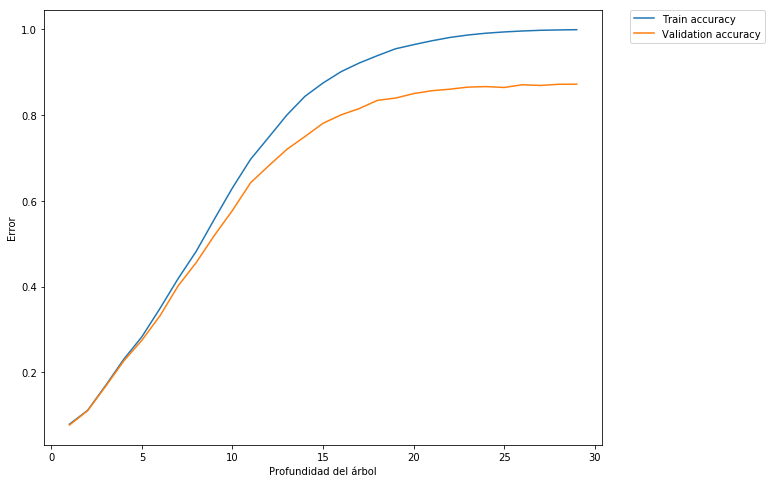

In [7]:
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

def train_tree(depth, x_tr, y_tr, x_v, y_v):
    # Entrenar el árbol
    model = Tree()
    model.set_params(max_depth=depth, criterion='gini', splitter='best')
    model.fit(x_tr, y_tr)

    y_tr_pred = model.predict(x_tr)
    y_v_pred = model.predict(x_v)


    train_error = (accuracy_score(y_tr, y_tr_pred))
    test_error = (accuracy_score(y_v, y_v_pred))

    return (train_error, test_error)

def graph_tree_range(params, x_tr, y_tr, x_v, y_v):
    train_errors = []
    test_errors = []

    for depth in params:
        print('Trying depth %d' % depth)
        (train, test) = train_tree(depth, x_tr, y_tr, x_v, y_v)
        train_errors.append(train)
        test_errors.append(test)

    plt.figure(figsize=(10, 8))
    plt.plot(params, train_errors, label="Train accuracy")
    plt.plot(params, test_errors, label="Validation accuracy")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('Profundidad del árbol')
    plt.ylabel('Error')
    plt.show()
    
params = np.arange(1, 30, 1)
graph_tree_range(params, x_tr, y_tr, x_v, y_v)

##### Con procesamiento

Trying depth 1
Trying depth 2
Trying depth 3
Trying depth 4
Trying depth 5
Trying depth 6
Trying depth 7
Trying depth 8
Trying depth 9
Trying depth 10
Trying depth 11
Trying depth 12
Trying depth 13
Trying depth 14
Trying depth 15
Trying depth 16
Trying depth 17
Trying depth 18
Trying depth 19
Trying depth 20
Trying depth 21
Trying depth 22
Trying depth 23
Trying depth 24
Trying depth 25
Trying depth 26
Trying depth 27
Trying depth 28
Trying depth 29


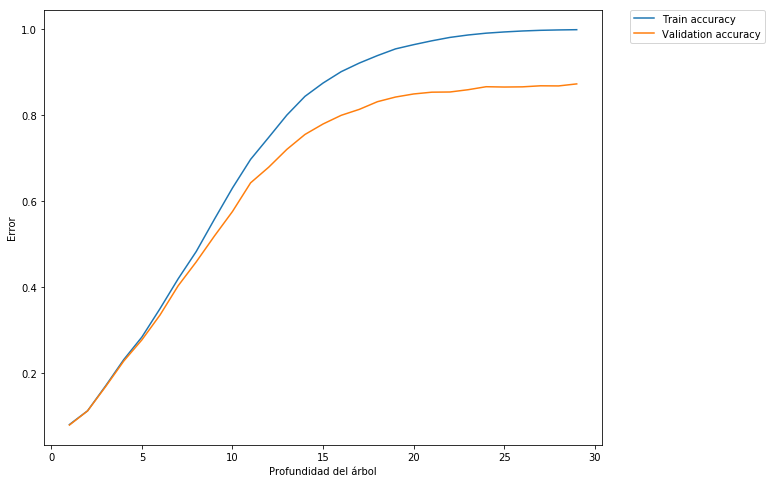

In [8]:
x_tr_scaled = center_and_scale(x_tr)
x_t_scaled = center_and_scale(x_t)
x_v_scaled = center_and_scale(x_v)

params = np.arange(1, 30, 1)
graph_tree_range(params, x_tr_scaled, y_tr, x_v_scaled, y_v)

# Selección de mejor modelo

Utilizando cada máquina con los mejores hiperparámetros y considerando datos con pre procesamiento, se tiene que el mejor modelo estará dado por el accuracy de los datos de testing. Se tiene:

In [26]:
from sklearn.metrics import accuracy_score

# Neural network
y_t_pred = model3.predict_classes(x_t.values)
print("Accuracy red neuronal: %f" % accuracy_score(y_t, y_t_pred))

tree_accuracy = train_tree(30, x_tr_scaled, y_tr, x_t_scaled, y_t)
print("Accuracy decision tree: %f" % tree_accuracy[1])

x_t_dim = pca_model.transform(x_t_scaled)
svm_errors = train_svm(0.75, x_tr_dim, y_tr, x_t_dim, y_t)
svm_errors

Accuracy red neuronal: 0.606247
Accuracy decision tree: 0.424289


(0.0, 0.19283324037925265)

In [31]:
svm_acc = (svm_errors[1] - 1)*-1
print("Accuracy SVM: %f" % svm_acc)

Accuracy SVM: 0.807167


La SVM lineal con kernel RBF presenta el mejor error de validación para este caso. Sin embargo, esto es sobre el conjunto de testing transformado a la representación con dimensionalidad reducida. Por esto, es muy probable que este modelo no sirva para generalizar las imágenes y es muy probable también que estemos en un caso de overfitting.

Por esto, es mejor seleccionar la redes neuronales o diseñar una nueva estrategia para mejorar la SVM. Esto es dificil considerando los problemas de rendimiento que presenta SVM al tener muchas opciones de clasificación ya que debe ajustar los hiperplanos para satisfacer demasiados constraints.

Por temas de capacidad computacional, es entonces aún más recomendable utilizar redes neuronales, ya que pueden llegar a resultados más verídicos en menos tiempo.